# Descomposición de la serie temporal con BFAST

BFAST es una libreria de R que permite el analisis de diferentes tipos de series temporales incluyendo las derivadas de datos satelitales. Se basa en la decomposición de la serie temporal (Yt) en un componente estacional (St) y una tendencia interanual (Tt) aplicando modelado estadístico. Además perimite detectar cambios abruptos en el componente estacional y la tendencia.

In [94]:
library(bfast)

###  Cargamos la información de un arbol

In [95]:
tree_group <- read.csv('./ndvi_inter.csv')
head(tree_group)

fecha,coordinadas,ndvi,ndvi_co
57.0000,368491.5884 6172450.31516,0.09428474,0.2548015
100.1429,368491.5884 6172450.31516,0.08479138,0.1679577
143.2857,368491.5884 6172450.31516,0.08200517,0.1592258
186.4286,368491.5884 6172450.31516,0.08510713,0.1673758
229.5714,368491.5884 6172450.31516,0.09405228,0.1736777
272.7143,368491.5884 6172450.31516,0.10980753,0.1761492


In [96]:
ts <- ts(tree_group$ndvi, start=min(tree_group$fecha),frequency = 8)
ts

Time Series:
Start = c(57, 1) 
End = c(59, 8) 
Frequency = 8 
 [1] 0.09428474 0.08479138 0.08200517 0.08510713 0.09405228 0.10980753
 [7] 0.11295669 0.11225066 0.10099826 0.08597013 0.08149129 0.08686549
[13] 0.09647385 0.11416175 0.11990905 0.11721886 0.10693898 0.09686920
[19] 0.09007779 0.09568649 0.10577446 0.12055959 0.12879731 0.12281157

### Realizamos el análisis de BFAST

In [105]:
bfast_ts <- bfast(ts,h=0.2,max.iter=1,season="harmonic")

### Graficamos
Se puede observar la separación de la serie temporal (Yt) en el componente estacional (St) y tendencia (Tt). En el caso de conjunto de árboles, vemos que la serie temporal tiene un componente estacional regular al cual se le adiciona una tendencia interanual creciente, es decir que este grupo pareciera saludable y estar crecimiento. 
Además de esta interpretación cualitativa, de estos datos se pueden derivar carácterísticas fenológicas cuantitativas que permiten determinaciones más precisas, como se describe en diversos papers como por ejemplo en: *Jönsson, P., & Eklundh, L. (2002). Seasonality extraction by function fitting to time-series of satellite sensor data. IEEE Transactions on Geoscience and Remote Sensing, 40(8), 1824–1832.*

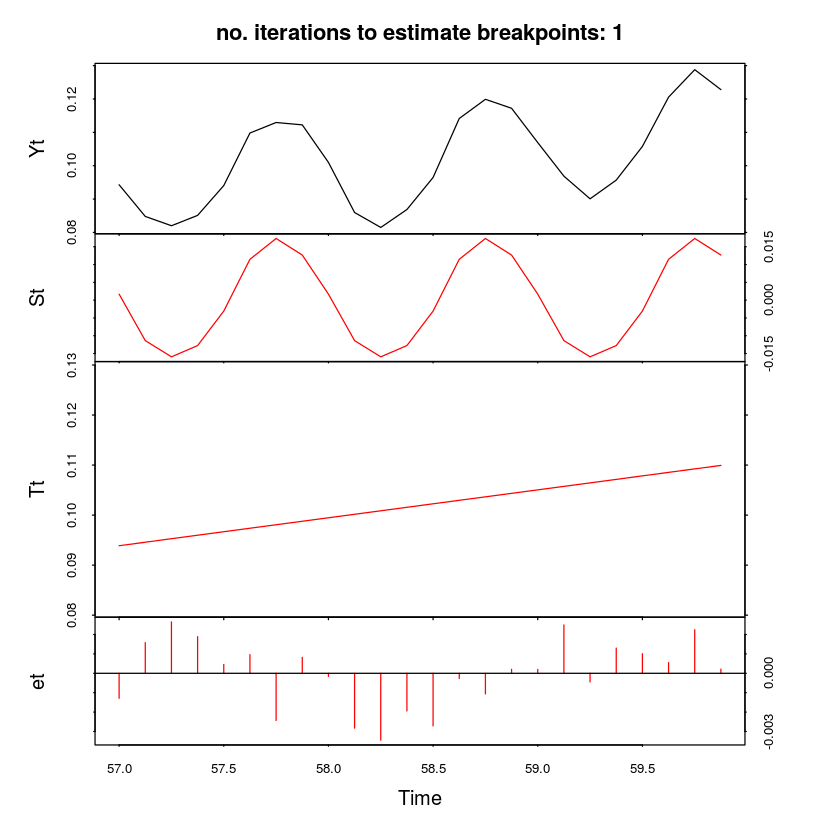

In [106]:
plot(bfast_ts, type = c("components", "all", "data", "seasonal", "trend", "noise"))


  TREND BREAKPOINTS:  None

  SEASONAL BREAKPOINTS:  None
